In [7]:
import hiive.mdptoolbox as mdptoolbox
import hiive.mdptoolbox.mdp as mdp
import hiive.mdptoolbox.example as example
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [371]:
#This Code adapted from: https://github.com/ryanym/cs7641/blob/master/assignment4/experiments.py
def build_matrix(environment, n_states, n_actions):
    """
    Convert openai discrete environment to Probability matrix and Reward matrix
    :param environment:
    :param n_states:
    :param n_actions:
    :return:
    """
    desc = np.reshape(env.desc,64)
    reward_matrix = np.zeros((states, actions))
    probability_matrix = np.zeros((actions, states, states))


    for state in range(n_states):
        for action in range(n_actions):
            for data_list in environment.env.P[state][action]:
                prob, next_state, reward, done = data_list
                reward_matrix[state, action] += reward
                if desc[next_state] == b'H':
                    reward_matrix[state, action] -= .25
                probability_matrix[action, state, next_state] = prob
                probability_matrix[action, state, :] = probability_matrix[action, state, :] / \
                                                       np.sum(probability_matrix[action, state, :])

    return probability_matrix, reward_matrix

In [393]:
env = gym.make('FrozenLake-v1', desc=None,map_name="8x8", is_slippery=True)
states = env.observation_space.n
actions = env.action_space.n
P2, R2 = build_matrix(env, states, actions)


In [410]:
vi = mdp.ValueIteration(P2,R2,0.7)
vi.setVerbose()
vi_stat = vi.run()

 Iteration   Variation
         1    1.250000
         2    0.568750
         3    0.277539
         4    0.160363
         5    0.108099
         6    0.069360
         7    0.045423
         8    0.031368
         9    0.021215
        10    0.014518
        11    0.010009
        12    0.006986
        13    0.004888
        14    0.003395
Iterating stopped, epsilon-optimal policy found.


In [413]:
vi_stat[-1]

{'State': None,
 'Action': None,
 'Reward': 1.3323873571529288,
 'Error': 0.0033949739730459484,
 'Time': 0.004602670669555664,
 'Max V': 1.3323873571529288,
 'Mean V': -0.13158382518574188,
 'Iteration': 14}

In [412]:
vi_stat[-1]['Mean V']

-0.13158382518574188

In [400]:
vi.policy
policy = np.reshape(vi.policy,(8,8))

In [401]:
vi.V
values = np.reshape(vi.V,(8,8))


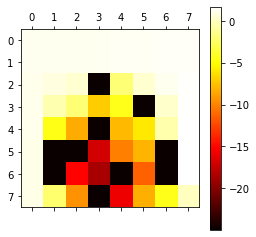

In [402]:
plt.matshow(values,cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [403]:
print(policy)
print(env.desc)

[[3 3 3 3 3 3 2 2]
 [3 3 3 3 3 3 3 2]
 [0 0 0 0 2 3 3 2]
 [0 0 0 1 0 0 2 2]
 [0 3 0 0 2 1 3 2]
 [0 0 0 3 3 0 0 2]
 [0 0 2 0 0 0 0 2]
 [0 1 1 0 3 2 1 0]]
[[b'S' b'F' b'F' b'F' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'F' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'F']
 [b'F' b'F' b'F' b'F' b'F' b'H' b'F' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'F']
 [b'F' b'H' b'H' b'F' b'F' b'F' b'H' b'F']
 [b'F' b'H' b'F' b'F' b'H' b'F' b'H' b'F']
 [b'F' b'F' b'F' b'H' b'F' b'F' b'F' b'G']]
